In [1]:
#นำเข้า Library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#อ่านไฟล์ product 
product = pd.read_csv("dh_product_lookup.csv")

In [3]:
#ตรวจสอบข้อมูลของตาราง และ missing value
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [4]:
# รายละเอียดของตาราง
# upc : เลข id ของสินค้า
# product_descripiton: คำอธิบายสินค้า
# commodity: ประเภทของสินค้า
# brand: ยี่ห้อของสินค้า
# product_size: ขนาดของสินค้า

In [5]:
#อ่านไฟล์ transaction
transaction = pd.read_csv("dh_transactions.csv")

In [6]:
#ตรวจสอบข้อมูลของตาราง และ missing value
transaction.info()
transaction.notnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
5197676,True,True,True,True,True,True,True,True,True,True,True
5197677,True,True,True,True,True,True,True,True,True,True,True
5197678,True,True,True,True,True,True,True,True,True,True,True
5197679,True,True,True,True,True,True,True,True,True,True,True


In [7]:
# รายละเอียดของตาราง
# upc : เลข id ของสินค้า
# dollar_sales : ยอดขาย
# units : จำนวนสินค้าที่ผู้บริโภคซื้อ
# time_of_transaction : เวลาของการทำธุรกรรม(เวลาทางทหาร)
# geography : ภูมิภาค (1,2)
# week : สัปดาห์ของการทำธุรกรรม
# household : หมายเลขครัวเรือน
# store: หมายเลขร้านค้า
# basket: ตระกร้าสินค้า
# day: วันของการทำธุรกรรม 
# coupon: 0 = ไม่ใช้คูปอง , 1 = ใช้คูปอง

In [8]:
#อ่านไฟล์ store
store = pd.read_csv("dh_store_lookup.csv")

In [9]:
#รวม product transaction และ store เข้าด้วยกัน
clean_data = pd.merge(product, transaction, on='upc', how='inner').merge(store,on='store')

In [10]:
#ตรวจสอบรายละเอียดของตาราง
clean_data.describe()
#เห็นได้ว่า คอลัมน์ dollar_sales มีค่าติดลบตรงค่า min ซึ่งในความเป็นจริง dollar_sales (ยอดขาย) ควรที่จะมากกว่า 0

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,store_zip_code
count,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06
mean,6.203548e+09,1.756568e+00,1.196616e+00,1.543559e+03,1.459126e+00,5.322320e+01,2.231376e+05,2.020152e+02,1.662961e+06,3.695358e+02,1.754398e-02,3.576937e+04
std,3.152023e+09,1.128989e+00,5.686024e-01,3.850193e+02,4.983265e-01,3.005075e+01,1.412164e+05,1.119982e+02,9.593189e+05,2.103872e+02,1.312867e-01,6.649668e+03
min,1.111124e+08,-1.176000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.906300e+04
25%,3.620000e+09,9.900000e-01,1.000000e+00,1.258000e+03,1.000000e+00,2.700000e+01,9.905300e+04,1.050000e+02,8.299060e+05,1.850000e+02,0.000000e+00,3.018900e+04
50%,5.100013e+09,1.500000e+00,1.000000e+00,1.602000e+03,1.000000e+00,5.500000e+01,2.096940e+05,2.090000e+02,1.666884e+06,3.800000e+02,0.000000e+00,3.704200e+04
75%,9.999982e+09,2.190000e+00,1.000000e+00,1.825000e+03,2.000000e+00,7.900000e+01,3.395680e+05,3.000000e+02,2.496495e+06,5.510000e+02,0.000000e+00,4.021400e+04
max,9.999986e+09,1.531400e+02,1.560000e+02,2.359000e+03,2.000000e+00,1.040000e+02,5.100270e+05,3.870000e+02,3.316349e+06,7.280000e+02,1.000000e+00,6.296600e+04


In [11]:
#เลือกข้อมูลที่ dolar sales มากกว่า 0
df = clean_data.loc[clean_data["dollar_sales"] > 0 ]

In [12]:
#ตรวจสอบรายละเอียดของตารางอีกรอบ
df.describe()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,store_zip_code
count,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06,5.188096e+06
mean,6.205031e+09,1.759975e+00,1.196697e+00,1.543646e+03,1.459434e+00,5.323352e+01,2.231164e+05,2.020686e+02,1.663209e+06,3.696076e+02,1.609203e-02,3.577247e+04
std,3.152957e+09,1.127167e+00,5.683504e-01,3.850368e+02,4.983518e-01,3.004763e+01,1.412376e+05,1.120017e+02,9.593364e+05,2.103655e+02,1.258296e-01,6.650165e+03
min,1.111124e+08,1.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.906300e+04
25%,3.620000e+09,9.900000e-01,1.000000e+00,1.258000e+03,1.000000e+00,2.700000e+01,9.899100e+04,1.060000e+02,8.304460e+05,1.850000e+02,0.000000e+00,3.018900e+04
50%,5.100013e+09,1.500000e+00,1.000000e+00,1.602000e+03,1.000000e+00,5.500000e+01,2.096455e+05,2.090000e+02,1.666866e+06,3.800000e+02,0.000000e+00,3.704200e+04
75%,9.999982e+09,2.190000e+00,1.000000e+00,1.825000e+03,2.000000e+00,7.900000e+01,3.395882e+05,3.000000e+02,2.496803e+06,5.510000e+02,0.000000e+00,4.021400e+04
max,9.999986e+09,1.531400e+02,1.560000e+02,2.359000e+03,2.000000e+00,1.040000e+02,5.100270e+05,3.870000e+02,3.316349e+06,7.280000e+02,1.000000e+00,6.296600e+04


Exploratory Data Analysis

1.กราฟยอดขายของแต่ละสัปดาห์ ของสินค้าแต่ละประเภท Pasta, Pasta Sauce, Pancake mix และ Syrup

In [13]:
weeklySales = df.groupby(['week','commodity',])['dollar_sales'].sum()
plot_weeklySale = weeklySales.unstack('commodity').loc[:'dollar_sales']

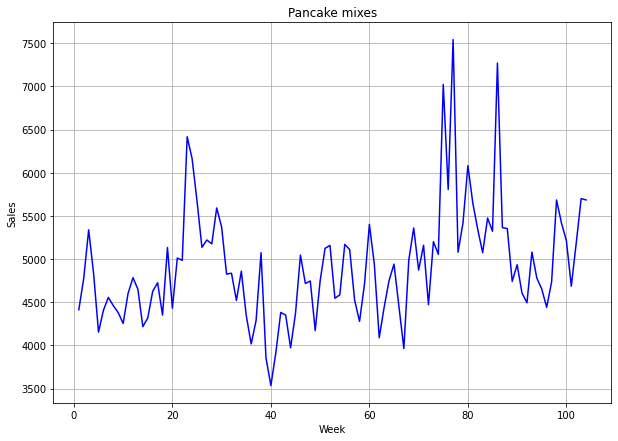

In [14]:
#Pancake mixes
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plot_weeklySale["pancake mixes"].plot(color="blue")
plt.title('Pancake mixes')
plt.xlabel('Week', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.grid()
plt.show()
f.savefig("pancakeMix_week.png")


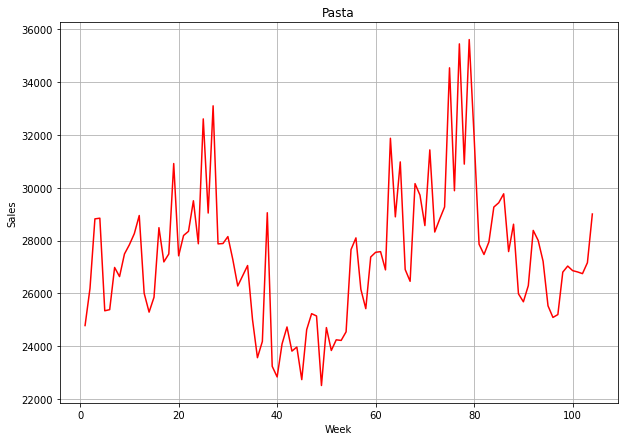

In [15]:
#Pasta
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plot_weeklySale["pasta"].plot(color="red")
plt.title('Pasta')
plt.xlabel('Week', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.grid()
plt.show()
f.savefig("pasta_week.png")

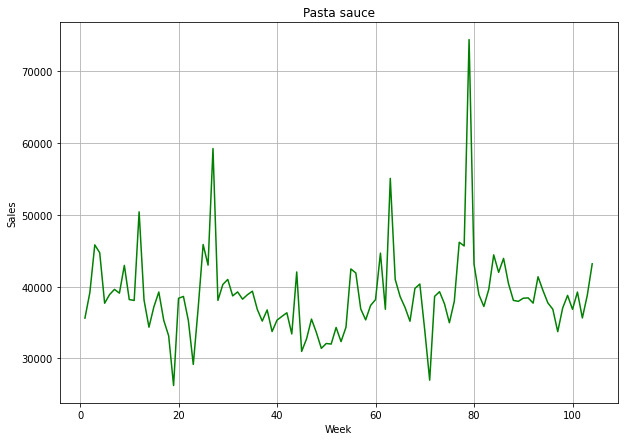

In [16]:
#Pasta sauce
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plot_weeklySale["pasta sauce"].plot(color="green")
plt.title('Pasta sauce')
plt.xlabel('Week', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.grid()
plt.show()
f.savefig("pastaSauce_week.png")

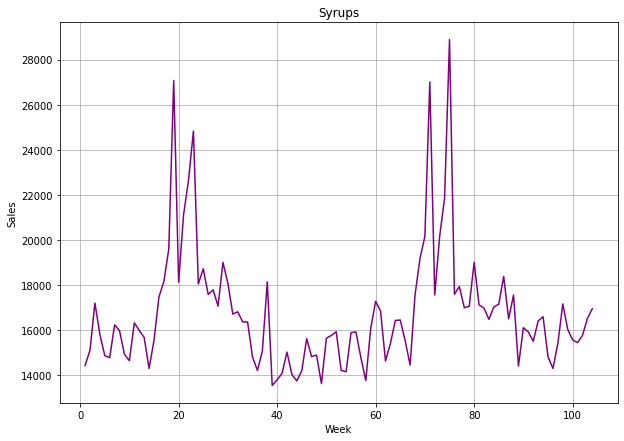

In [17]:
#Syrups
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plot_weeklySale["syrups"].plot(color="purple")
plt.title('Syrups')
plt.xlabel('Week', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.grid()
plt.show()
f.savefig("syrups_week.png")

2.กราฟจำนวนครั้งที่ซื้อสินค้าของสินค้าแต่ละประเภท (Pancake mixes,Pasta,Pasta sauce,Syrups)

In [18]:
count_product = df.groupby("commodity").count()

In [19]:
count_product.reset_index(inplace=True)

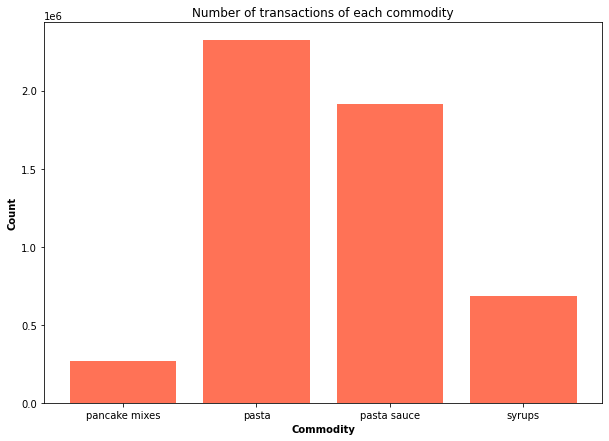

In [20]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.bar(count_product["commodity"],count_product["upc"],color='#FF7256')
plt.title('Number of transactions of each commodity')
plt.xlabel('Commodity', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()
f.savefig("number_transactions.png")


3.กราฟจำนวนครั้งที่ซื้อสินค้ามากที่สุด 5 อันดับของสินค้าแต่ละประเภท

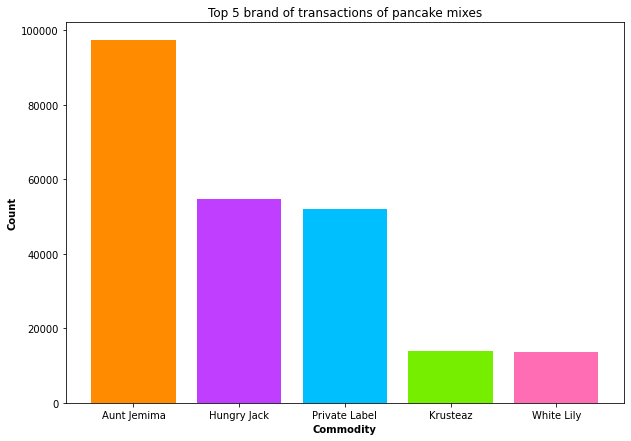

In [21]:
#Pancake mixes
count_PanMix = df[df['commodity'] == 'pancake mixes'].groupby("brand").count().sort_values(by = "upc",ascending=False).head(5)
count_PanMix.reset_index(inplace=True)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.bar(count_PanMix["brand"],count_PanMix["upc"],color=['#FF8C00','#BF3EFF','#00BFFF',"#76EE00","#FF6EB4"])
plt.title('Top 5 brand of transactions of pancake mixes')
plt.xlabel('Commodity', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()
f.savefig("top5_pancakeMix.png")

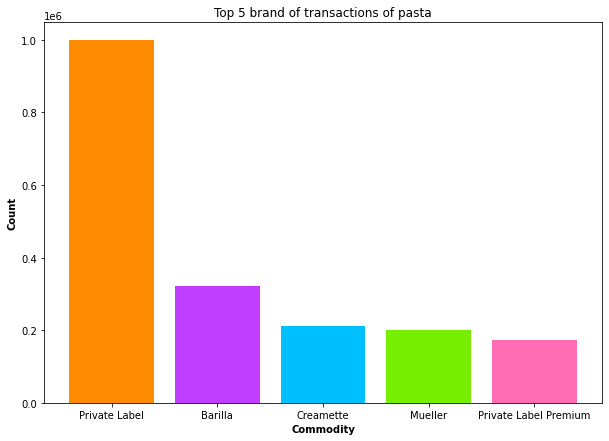

In [22]:
#Pasta
count_PanMix = df[df['commodity'] == 'pasta'].groupby("brand").count().sort_values(by = "upc",ascending=False).head(5)
count_PanMix.reset_index(inplace=True)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.bar(count_PanMix["brand"],count_PanMix["upc"],color=['#FF8C00','#BF3EFF','#00BFFF',"#76EE00","#FF6EB4"])
plt.title('Top 5 brand of transactions of pasta')
plt.xlabel('Commodity', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()
f.savefig("top5_pasta.png")

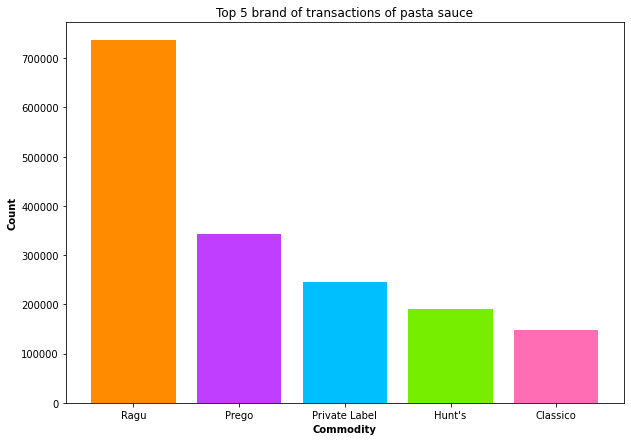

In [23]:
#Pasta sauce
count_PanMix = df[df['commodity'] == 'pasta sauce'].groupby("brand").count().sort_values(by = "upc",ascending=False).head(5)
count_PanMix.reset_index(inplace=True)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.bar(count_PanMix["brand"],count_PanMix["upc"],color=['#FF8C00','#BF3EFF','#00BFFF',"#76EE00","#FF6EB4"])
plt.title('Top 5 brand of transactions of pasta sauce')
plt.xlabel('Commodity', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()
f.savefig("top5_pastaSauce.png")

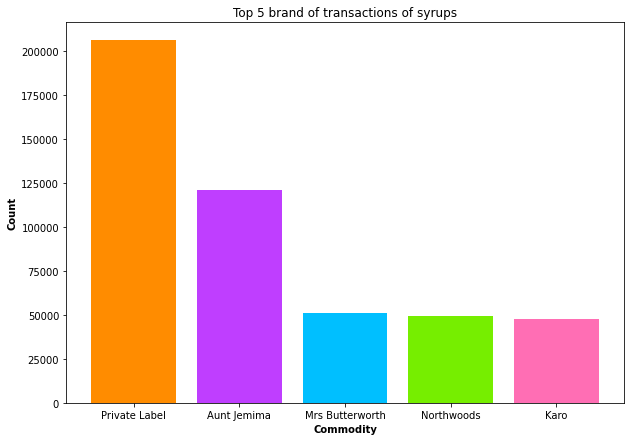

In [24]:
#Syrups
count_PanMix = df[df['commodity'] == 'syrups'].groupby("brand").count().sort_values(by = "upc",ascending=False).head(5)
count_PanMix.reset_index(inplace=True)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.bar(count_PanMix["brand"],count_PanMix["upc"],color=['#FF8C00','#BF3EFF','#00BFFF',"#76EE00","#FF6EB4"])
plt.title('Top 5 brand of transactions of syrups')
plt.xlabel('Commodity', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()
f.savefig("top5_syrups.png")

4.กราฟการใช้คูปองในการซื้อสินค้าแต่ละประเภท (Pancake mixes,Pasta,Pasta sauce,Syrups)

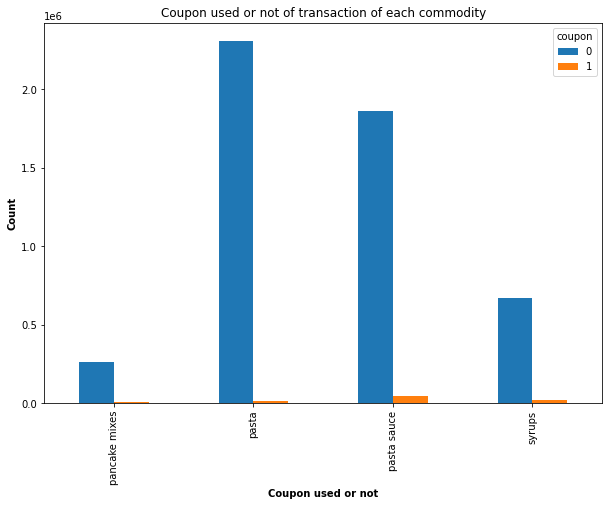

In [28]:
coupon_use = pd.pivot_table(df,values="upc",index="commodity",columns="coupon", aggfunc=np.count_nonzero).plot(kind="bar")
fig = coupon_use.get_figure()
fig.set_size_inches(10, 7)
coupon_use.set_xlabel("Coupon used or not", fontweight='bold')
coupon_use.set_ylabel("Count", fontweight='bold')
coupon_use.set_title("Coupon used or not of transaction of each commodity")
plt.show()
fig.savefig("coupon_used.png")

5.กราฟจำนวนครั้งที่ซื้อสินค้าในแต่ละภูมิภาค(geography)

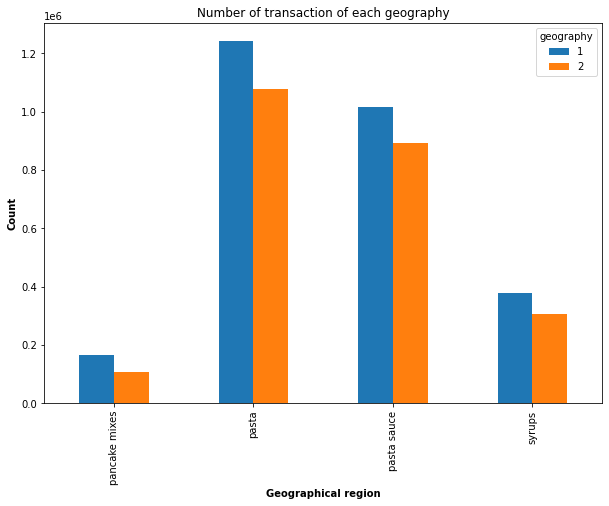

In [26]:
coupon_use = pd.pivot_table(df,values="upc",index="commodity",columns="geography", aggfunc=np.count_nonzero).plot(kind="bar")
fig = coupon_use.get_figure()
fig.set_size_inches(10, 7)
coupon_use.set_xlabel("Geographical region", fontweight='bold')
coupon_use.set_ylabel("Count", fontweight='bold')
coupon_use.set_title("Number of transaction of each geography")
plt.show()
fig.savefig("geography.png")